In [2]:
"""
The notebook shows the score that can be achieved by Support Vector Classifier on breast cancer dataset.
The model scoring shows 0.95 score. But AUC gives accuracy of 0.99. The best model prameters are found automaticlly.
"""

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# load and split the data for predicition
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, random_state=0)

# set the possible range of parameters for the model to be tried on
param_grid = [{'kernel': ['rbf'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

# find the best parameters for the classifier
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid_search.decision_function(X_test))))
print("Test set accuracy: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# using the best parameters for the model check scores on the dataset
svc = grid_search.best_estimator_
scores = cross_val_score(GridSearchCV(svc, param_grid, cv=5, return_train_score=True), 
                         data.data, data.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


Grid-Search with accuracy
Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.960
Test set AUC: 0.995
Test set accuracy: 0.96
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Cross-validation scores:  [0.93913043 0.93043478 0.97345133 0.92035398 0.98230088]
Mean cross-validation score:  0.9491342824163139


Test score: 0.96
Confusion matrix:
[[52  1]
 [ 5 85]]
f1 score most frequent: 0.97
             precision    recall  f1-score   support

          0       0.91      0.98      0.95        53
          1       0.99      0.94      0.97        90

avg / total       0.96      0.96      0.96       143

AUC: 0.995
Explicit accuracy scoring: [0.93684211 0.96842105 0.94708995]
AUC scoring: [0.99467393 0.9975145  0.98751501]


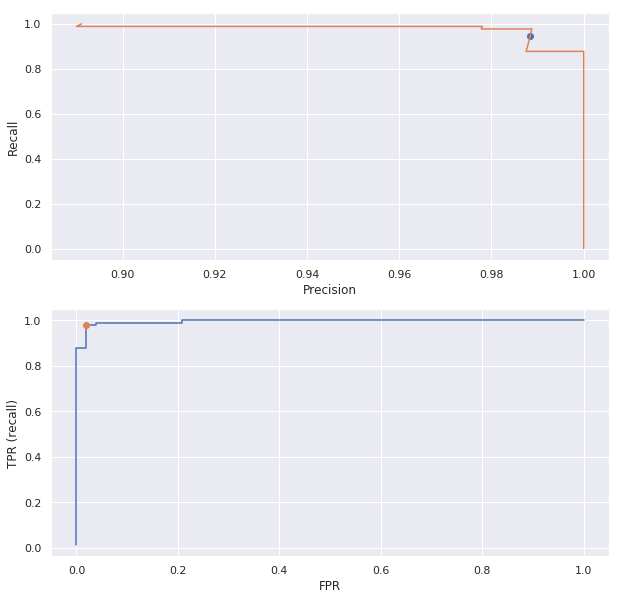

In [3]:
"""Attempt to get the best from the model and find 0.99 score from AUC scoring"""

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# check the confusion matrix with other meta-parametes
model = svc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test score: {:.2f}".format(model.score(X_test, y_test)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# visualisation of confusion matrix coefs for manual adjusting if needed
plt.figure(figsize=(10, 10))
plt.subplot(211)
precision, recall, thresholds = precision_recall_curve(
    y_test, model.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o')
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

plt.subplot(212)
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o')

# get the mean score
auc = roc_auc_score(y_test, model.decision_function(X_test))
print("AUC: {:.3f}".format(auc))

# check the mean scores by cross-validation to see the best
explicit_accuracy = cross_val_score(model, data.data, 
                                    data.target, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

roc_auc = cross_val_score(model, data.data,
                         data.target, scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))